<img align="right" style="padding-right:10px;" src="figures_wk2/sampling_bias.png" width=300><br>
# Week 2 Lab - Calculating Probability

 This week's assignment will give you some practice in describing a dataset and probablity calculations.

##  Our Dataset
**Dataset Name::** flights.csv, airlines.csv, airports.csv (found in the assign_wk2 folder)<br>
You really only need the flights.csv to complete the assignment, however, the other two datasets provide some reference info that you might find interesting. 

Since the original flights dataset has **lots** of missing data, I have provided a cleaned up version for you to use (flights_clean.csv). I have also provided the notebook that I used to clean up the dataset (Clean_Flights_Data). For those of you who wish to try your hand at data cleaning, I have provided a notebook demonstrating data imputation data (Demo_Imputing_Data). You get to decide which version of the dataset you wish to use.

# Assignment Requirements
Here are the requirements for this week's assignment:
* Load flights.csv into a dataframe and handle the missing values. Justify your approach!
   - Warning!! You are going to need some of the rows/columns with missing values, so don't just throw them away while creating your dataframe
* The column 'ARRIVAL_DELAY' tells you the number of minutes the flight actually arrived verses the scheduled arrival. There are a fair number of missing values for this column, impute (see demo below) this column. Document your approach!
    - Hint: A negative number means the flight arrived early.
    - Hint: What other columns might you use to fill in this missing data.
* Provide an analysis of delayed flights based on the airport the flight originated from. your analysis should answer the following questions.
    - Is the distribution of delayed flights normally distributed?
        * Describe the shape of the distribution based on the QQ-plot.
    - What is the probablity a flight leaving from a given airport will arrive at its destination late?  
        * Hint: Calculate the probablity of late arrival at destination for each originating airport.
    - Determine the originaing airport with the largest proportion of flights arriving late to their destination. Do the same for the airport with the smallest proportion. 
        * What is the difference between probablility and proportion? (see note below)
    - What is the mean and std of late arrival times for both of these airports.
        * Based on the mean and std information ONLY, which airport seems like a better choice?
    - Use these two airports and compare their histograms of arrival delays with each other. 
        * Which airport seems like you would have a better chance at arriving at your destination on time? Use the histograms to backup your conclusion!
     

## Portion vs Probablity
What is the difference between probablity and proportion? We have already defined probability above. Let's define proportion now. <br>
Proportion measures the likelihood that an event <b><i>has</i></b> occurred.

Meaning, you want to produce a ratio of delayed vs non-delayed flights for each originating airport. The focus in a proporion is on what <b><i>has</i></b> happened vs. in a probability we are looking at what <b><i>might</i></b> happen.

# Deliverables
Upload your Jupyter Notebook to the corresponding location in WorldClass. 

**Note::** Make sure you have clearly indicated each assignment requirement within your notebook.

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

sns.set()


In [28]:
#loading our dataset
data_df = pd.read_csv('C:/Users/Asmita Bamma/Downloads/assign_wk2/assign_wk2/flights_clean.csv')
data_df.head(10)

,year,month,day,day_of_week,airline,flight_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,scheduled_time,elapsed_time,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled
0,2015,1,1,4,AS,98,ANC,SEA,5,2354.0,-11.0,205.0,194.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,LAX,PBI,10,2.0,-8.0,280.0,279.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,SFO,CLT,20,18.0,-2.0,286.0,293.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,LAX,MIA,20,15.0,-5.0,285.0,281.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,SEA,ANC,25,24.0,-1.0,235.0,215.0,320,259.0,-21.0,0,0
5,2015,1,1,4,DL,806,SFO,MSP,25,20.0,-5.0,217.0,230.0,602,610.0,8.0,0,0
6,2015,1,1,4,NK,612,LAS,MSP,25,19.0,-6.0,181.0,170.0,526,509.0,-17.0,0,0
7,2015,1,1,4,US,2013,LAX,CLT,30,44.0,14.0,273.0,249.0,803,753.0,-10.0,0,0
8,2015,1,1,4,AA,1112,SFO,DFW,30,19.0,-11.0,195.0,193.0,545,532.0,-13.0,0,0
9,2015,1,1,4,DL,1173,LAS,ATL,30,33.0,3.0,221.0,203.0,711,656.0,-15.0,0,0


Provide an analysis of delayed flights based on the airport the flight originated from. your analysis should answer the following questions.
Is the distribution of delayed flights normally distributed?
Describe the shape of the distribution based on the QQ-plot.

In [3]:
delayed_flights= data_df["departure_delay"]
delayed_flights

0         -11.0
1          -8.0
2          -2.0
3          -5.0
4          -1.0
           ... 
5245479    -4.0
5245480    -4.0
5245481    -9.0
5245482    -6.0
5245483    15.0
Name: departure_delay, Length: 5245484, dtype: float64

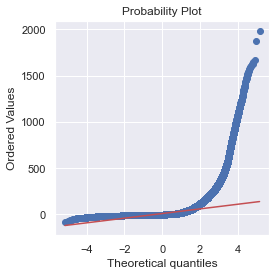

In [4]:
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(delayed_flights, plot=ax)

plt.tight_layout()
plt.show()

The distribution of delayed flights is not normally distributed as we can see in the above graph, in fact, it is skewed more towards right. High values are way over the line.The departures has been impacted by various other factors so the graph is not normally distributed.

What is the probablity a flight leaving from a given airport will arrive at its destination late? Hint: Calculate the probablity of late arrival at destination for each originating airport.

In [5]:
load_flights = data_df[['origin_airport','destination_airport','arrival_delay']]
load_flights['delayed'] = data_df.arrival_delay.apply(lambda x:x>0)
load_flights.head(10)

<ipython-input-5-a3843c624ba7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load_flights['delayed'] = data_df.arrival_delay.apply(lambda x:x>0)


,origin_airport,destination_airport,arrival_delay,delayed
0,ANC,SEA,-22.0,False
1,LAX,PBI,-9.0,False
2,SFO,CLT,5.0,True
3,LAX,MIA,-9.0,False
4,SEA,ANC,-21.0,False
5,SFO,MSP,8.0,True
6,LAS,MSP,-17.0,False
7,LAX,CLT,-10.0,False
8,SFO,DFW,-13.0,False
9,LAS,ATL,-15.0,False


In [6]:
counts = load_flights.groupby(['origin_airport','delayed']).size().unstack().reset_index()
cols = ['airport','delay_no','delay_yes']
counts.columns = cols
counts.head(10)

,airport,delay_no,delay_yes
0,ABE,1409,826
1,ABI,1546,686
2,ABQ,12008,6972
3,ABR,417,246
4,ABY,558,309
5,ACK,324,162
6,ACT,1073,466
7,ACV,820,449
8,ACY,2099,1433
9,ADK,32,57


In [7]:
counts = load_flights.groupby(['origin_airport','delayed']).size().unstack().reset_index()
cols = ['airport','delay_no','delay_yes']
counts.columns = cols
counts.head(10)

,airport,delay_no,delay_yes
0,ABE,1409,826
1,ABI,1546,686
2,ABQ,12008,6972
3,ABR,417,246
4,ABY,558,309
5,ACK,324,162
6,ACT,1073,466
7,ACV,820,449
8,ACY,2099,1433
9,ADK,32,57


In [8]:
counts['total_flights']= counts.delay_no + counts.delay_yes
counts['probable_delays'] = counts.delay_no/counts.total_flights
counts

,airport,delay_no,delay_yes,total_flights,probable_delays
0,ABE,1409,826,2235,0.630425
1,ABI,1546,686,2232,0.692652
2,ABQ,12008,6972,18980,0.632666
3,ABR,417,246,663,0.628959
4,ABY,558,309,867,0.643599
...,...,...,...,...,...
317,WRG,417,236,653,0.638591
318,WYS,150,58,208,0.721154
319,XNA,5259,3728,8987,0.585179
320,YAK,495,162,657,0.753425


In [9]:
print("number of airports : {}".format(len(data_df['origin_airport'].unique())))

number of airports : 322


In [10]:
#number of flights at each airport
tot_flights = data_df['origin_airport'].value_counts()
tot_flights

ATL    344279
ORD    277336
DFW    233297
DEN    193932
LAX    192509
        ...  
STC        78
DLG        77
GST        76
AKN        63
ITH        30
Name: origin_airport, Length: 322, dtype: int64

In [11]:
#arrival delay total
airport_arrival_delay = data_df.groupby('origin_airport')['arrival_delay'].sum()
airport_arrival_delay

origin_airport
ABE    10808.55
ABI     6691.00
ABQ    89026.85
ABR     6570.00
ABY     6190.00
         ...   
WRG     2939.25
WYS     -388.00
XNA    96484.15
YAK    -3735.80
YUM     4050.00
Name: arrival_delay, Length: 322, dtype: float64

In [12]:
#mean arrival delay

#mean_arrival_delay = df['arrival delay total time']/df['no_flights']
#mean_arrival_delay

mean_arrival_delay = data_df[['origin_airport','destination_airport','arrival_delay']].groupby(['origin_airport','destination_airport']).mean('arrival_delay').reset_index()
mean_arrival_delay.rename(columns = {'arrival_delay' : 'Mean_arrival_delay'},inplace= True)
mean_arrival_delay

,origin_airport,destination_airport,Mean_arrival_delay
0,ABE,ATL,1.286011
1,ABE,DTW,6.348637
2,ABE,ORD,8.084877
3,ABI,DFW,2.997760
4,ABQ,ATL,-0.577500
...,...,...,...
4683,XNA,SFO,13.078431
4684,XNA,SLC,-20.000000
4685,YAK,CDV,-2.014634
4686,YAK,JNU,-9.346505


In [13]:
#sum of flate flights time
number_late_arrivals =(data_df['arrival_delay']>0).sum()
number_late_arrivals

1947990

In [14]:
#no.of late flights by origin_airport )(>0) time
delays= data_df[data_df["arrival_delay"]>0].groupby('origin_airport')['arrival_delay'].count()
delays

origin_airport
ABE     826
ABI     686
ABQ    6972
ABR     246
ABY     309
       ... 
WRG     236
WYS      58
XNA    3728
YAK     162
YUM     627
Name: arrival_delay, Length: 322, dtype: int64

In [15]:
#prob of late arrival
late_arrival_prob = number_late_arrivals/tot_flights
late_arrival_prob = late_arrival_prob.round(4)
late_arrival_prob

ATL        5.6582
ORD        7.0239
DFW        8.3498
DEN       10.0447
LAX       10.1190
          ...    
STC    24974.2308
DLG    25298.5714
GST    25631.4474
AKN    30920.4762
ITH    64933.0000
Name: origin_airport, Length: 322, dtype: float64

Determine the originaing airport with the largest proportion of flights arriving late to their destination. Do the same for the airport with the smallest proportion.
What is the difference between probablility and proportion? 

In [16]:
# highest proportion
counts['total_flights']= counts.delay_no + counts.delay_yes
counts['proportion_delayed'] = counts.delay_yes/counts.total_flights
hp_flight = counts.sort_values([("proportion_delayed")],ascending= False)[:1]
hp_flight

,airport,delay_no,delay_yes,total_flights,probable_delays,proportion_delayed
133,GST,25,51,76,0.328947,0.671053


In [17]:
# lowest proportion
lp_flight = counts.sort_values([("proportion_delayed")])[:1]
lp_flight

,airport,delay_no,delay_yes,total_flights,probable_delays,proportion_delayed
70,CNY,197,8,205,0.960976,0.039024


What is the mean and std of late arrival times for both of these airports.
Based on the mean and std information ONLY, which airport seems like a better choice?

In [18]:
df = data_df.groupby(['origin_airport']).agg(['mean', 'std'])
df

year          month                  day            \
                mean  std      mean       std       mean       std   
origin_airport                                                       
ABE             2015  0.0  6.314541  3.239464  15.717673  8.698338   
ABI             2015  0.0  6.075717  3.420101  15.601254  8.659325   
ABQ             2015  0.0  6.276185  3.299912  15.687250  8.786295   
ABR             2015  0.0  6.235294  3.430205  15.601810  8.787254   
ABY             2015  0.0  6.158016  3.427129  15.716263  8.763126   
...              ...  ...       ...       ...        ...       ...   
WRG             2015  0.0  6.188361  3.407370  15.689127  8.797997   
WYS             2015  0.0  7.495192  1.107714  15.817308  8.774980   
XNA             2015  0.0  6.277957  3.332385  15.669745  8.747527   
YAK             2015  0.0  6.210046  3.411113  15.671233  8.759227   
YUM             2015  0.0  6.160194  3.411626  15.584682  8.769711   

               day_of_week           flight_number               ...  \
                      mean       std          mean          std  ...   
origin_airport                                                   ...   
ABE               3.765101  1.952855   4893.660850  1210.268196  ...   
ABI               3.919355  1.991632   3301.284498   181.064411  ...   
ABQ               3.916070  1.994873   2145.279294  1692.148371  ...   
ABR               4.000000  2.009043   7364.702866     6.801509  ...   
ABY               3.901961  2.010557   5301.101499    81.757676  ...   
...                    ...       ...           ...          ...  ...   
WRG               3.998469  2.011088     64.502297     0.500378  ...   
WYS               4.201923  2.063625   7414.480769     2.961853  ...   
XNA               3.748192  1.931706   4098.275287  1068.302311  ...   
YAK               3.981735  2.009801     63.503805     2.501902  ...   
YUM               3.935275  2.000301   2913.595469   476.084396  ...   

               scheduled_arrival             arrival_time              \
                            mean         std         mean         std   
origin_airport                                                          
ABE                  1315.700671  452.824491  1323.872426  467.284571   
ABI                  1191.265681  417.997383  1192.622760  425.353649   
ABQ                  1419.503846  446.190102  1419.303949  460.490114   
ABR                  1125.853695  501.160555  1143.546003  515.666879   
ABY                  1213.348328  466.299095  1226.026528  477.041855   
...                          ...         ...          ...         ...   
WRG                  1423.404288  303.767330  1424.463790  303.346584   
WYS                  1506.793269  132.192988  1494.350962  153.334773   
XNA                  1408.123067  445.891383  1421.721456  455.479641   
YAK                  1575.407915  340.873467  1563.615385  329.404388   
YUM                  1276.018878  380.077485  1282.086839  380.411209   

               arrival_delay             diverted           cancelled       
                        mean        std      mean       std      mean  std  
origin_airport                                                              
ABE                 4.836040  52.770820  0.003579  0.059734         0  0.0  
ABI                 2.997760  44.731556  0.000448  0.021167         0  0.0  
ABQ                 4.690561  56.742204  0.003267  0.057062         0  0.0  
ABR                 9.909502  72.798490  0.000000  0.000000         0  0.0  
ABY                 7.139562  43.477399  0.001153  0.033962         0  0.0  
...                      ...        ...       ...       ...       ...  ...  
WRG                 4.501149  34.860839  0.006126  0.078086         0  0.0  
WYS                -1.865385  23.839462  0.000000  0.000000         0  0.0  
XNA                10.735969  59.171044  0.002671  0.051611         0  0.0  
YAK                -5.686149  27.466052  0.010654  0.102747         0  0.0  
YU

In [24]:
# GST airport measures
GST = df.loc ["GST","arrival_delay"]
GST

mean    21.763158
std     38.217577
Name: GST, dtype: float64

In [25]:
# CNY airport measures
CNY = df.loc ["CNY","arrival_delay"]
CNY

mean   -20.678049
std     12.548875
Name: CNY, dtype: float64

Looking at our results, CNY airport would be a better choice because the mean is -20.67 which means the arrival chances are earlier rather than any delays and also the standarad deviation of CNY is less which is tighter to mean of delays.

Use these two airports and compare their histograms of arrival delays with each other.
Which airport seems like you would have a better chance at arriving at your destination on time? Use the histograms to backup your conclusion!

<AxesSubplot:>

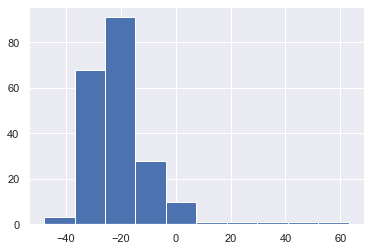

In [27]:
cny_flights = data_df[data_df ['origin_airport'] == 'CNY']
cny_flights.arrival_delay.hist()

<AxesSubplot:>

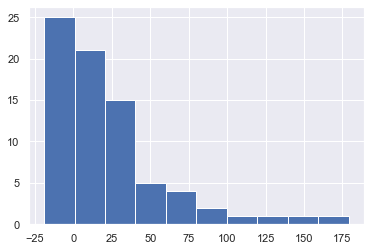

In [22]:
gst_flights = data_df[data_df ['origin_airport'] == 'GST']
gst_flights.arrival_delay.hist()

Comparing the two histographs above, cny_flights and gst_flights show skewness, however GST airport has more delay frequency. So, CNY airport has more potential to arrive on time and even earlier since most values are negative(early arrival).